# WP2 - Optimal Control Problem Demo

This notebook demonstrates solving the 6-DOF rocket ascent OCP using direct collocation.


In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Add project root to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))
sys.path.insert(0, str(project_root / 'src'))

from python.data_gen.solve_ocp import (
    load_parameters,
    load_scales,
    solve_ocp,
    save_results
)


## Load Configuration and Solve OCP


In [2]:
# Load configurations
project_root = Path().resolve().parent
params, limits, ocp_config = load_parameters(
    str(project_root / 'configs' / 'phys.yaml'),
    str(project_root / 'configs' / 'limits.yaml'),
    str(project_root / 'configs' / 'ocp.yaml')
)
scales = load_scales(str(project_root / 'configs' / 'scales.yaml'))

# Solve OCP
result = solve_ocp(params, limits, ocp_config, scales)

print(f"OCP solved!")
print(f"  Objective: {result['stats']['objective']:.6f}")
print(f"  Iterations: {result['stats']['iterations']}")
print(f"  Solver time: {result['stats']['solver_time']:.2f} s")


Solving OCP...

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:    21571
Number of nonzeros in inequality constraint Jacobian.:      854
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1095
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1095
                     variables with only upper bounds:        0
Total number of equality constraints.................:      840
Total number 

## Visualize Trajectory


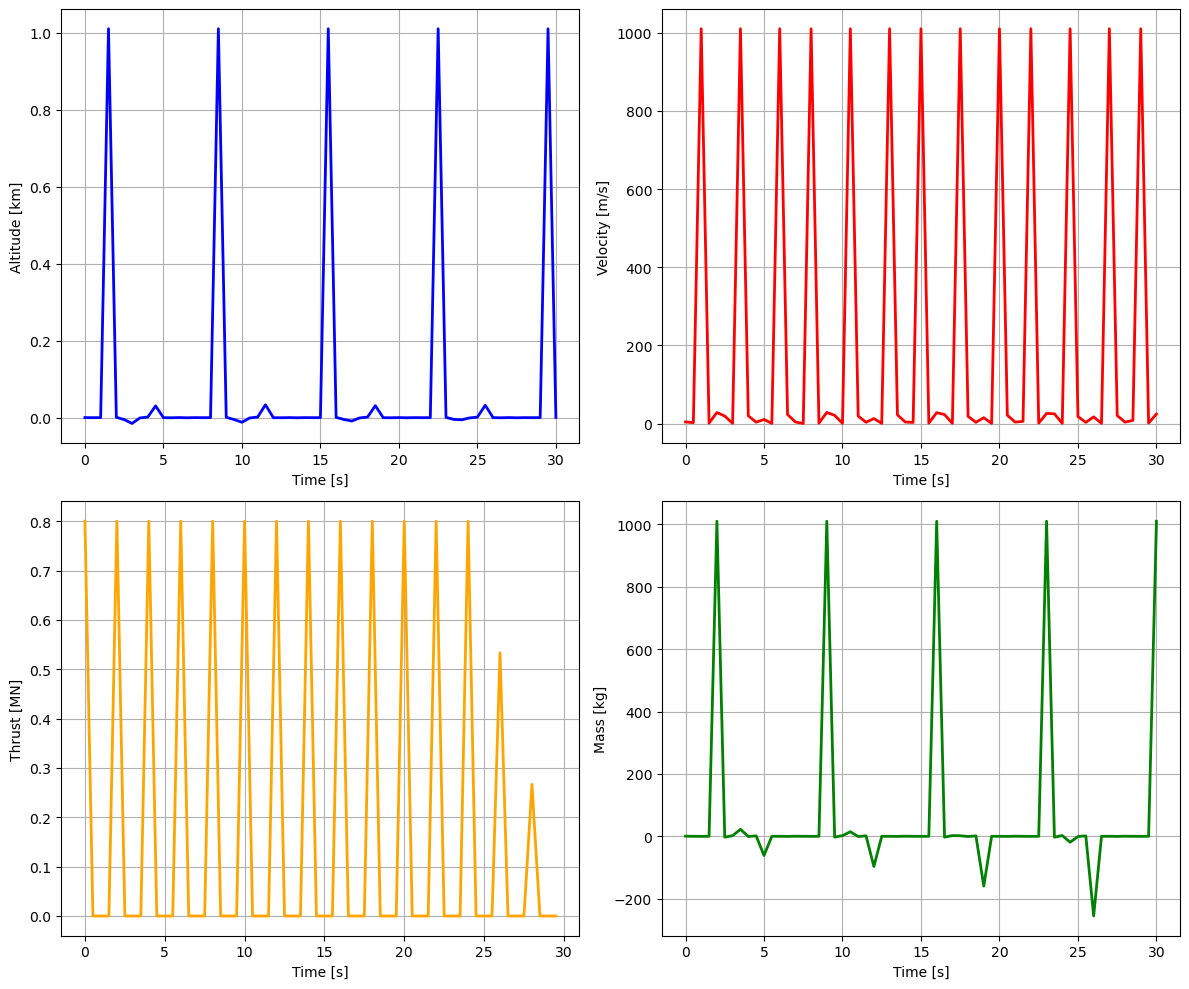

In [3]:
# Extract trajectory
X = result['X']
U = result['U']
t = result['t']

# Plot altitude and velocity
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].plot(t, X[2, :] / 1e3, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Altitude [km]')
axes[0, 0].grid(True)

v_mag = np.linalg.norm(X[3:6, :], axis=0)
axes[0, 1].plot(t, v_mag, 'r-', linewidth=2)
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Velocity [m/s]')
axes[0, 1].grid(True)

axes[1, 0].plot(t[:-1], U[0, :] / 1e6, 'orange', linewidth=2)
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Thrust [MN]')
axes[1, 0].grid(True)

axes[1, 1].plot(t, X[13, :], 'g-', linewidth=2)
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Mass [kg]')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()
